In [1]:
using KitBase, Plots, Distributions
using KitBase.JLD2, KitBase.LinearAlgebra, Flux
using Flux: @epochs

┌ Info: Kinetic will run serially
└ @ KitBase /home2/vavrines/.julia/packages/KitBase/YzrAE/src/KitBase.jl:66


LoadError: ArgumentError: Package JLD2 not found in current path:
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.


In [ ]:
using 

In [11]:
file = open("/home2/vavrines/Downloads/pdfs.csv")
data = []
for line in eachline(file)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 2:length(a)]
    push!(data, b)
end
pdfs = data[3:end];

vs = VSpace1D(-5.0, 5.0, length(data[1]), data[1], data[1][2:end] .- data[1][1:end-1], data[2])
δ = heaviside.(vs.u);

kn = 1e-3
dx = 1e-2

0.01

In [15]:
sw1 = @. (ws[2] - ws[1]) / dx
sw2 = @. (ws[5] - ws[4]) / dx

3-element Vector{Float64}:
  -42.98882604193359
 -128.77578126631624
 -108.1439441658719

In [58]:
data[1]

99-element Vector{Float64}:
 -9.984919506396
 -9.962951347331
 -9.931249370374
 -9.88984395243
 -9.838775407061
 -9.778093584869
 -9.707857757637
 -9.628136542558
 -9.539007829255
 -9.440558701363
 -9.332885350431
 -9.216092981453
 -9.090295709825
  ⋮
  9.332885350431
  9.440558701363
  9.539007829255
  9.628136542558
  9.707857757637
  9.778093584869
  9.838775407061
  9.88984395243
  9.931249370374
  9.962951347331
  9.984919506396
  9.997137267734

In [35]:
ws = [moments_conserve(pdfs[i], data[1], data[2]) for i in axes(pdfs, 1)]
w = zeros(9, 3)
for i in 1:9
    w[i, :] .= ws[i]
end

In [44]:
gam = 3
K = 0
mu = ref_vhs_vis(kn, 1, 0.5)

prim = conserve_prim(ws[3], gam)
Mu, Mxi, _, _1 = gauss_moments(prim, K)
a = pdf_slope(prim, sw1, K)
swt = -prim[1] .* moments_conserve_slope(a, Mu, Mxi, 1)
A = pdf_slope(prim, swt, K)
tau1 = vhs_collision_time(prim, mu, 0.81)
fr1 = chapman_enskog(vs.u, prim, a, A, tau1)

99-element Vector{Float64}:
 5.380728949855418e-29
 7.080732502204905e-29
 1.0512275663312392e-28
 1.7580956418181905e-28
 3.3056781343517824e-28
 6.971090478073525e-28
 1.644075840196505e-27
 4.322120427732453e-27
 1.2618806558292814e-26
 4.074782881042692e-26
 1.4487937846281085e-25
 5.6443776661186825e-25
 2.397027093451581e-24
 ⋮
 3.7646194930328153e-23
 1.1251915273394029e-23
 3.6833372227630026e-24
 1.3264867997366951e-24
 5.27693590968371e-25
 2.327428808087206e-25
 1.1418416222741473e-25
 6.248915669648991e-26
 3.823996925037514e-26
 2.6217727145201525e-26
 2.0169182968153374e-26
 1.742715626859771e-26

In [31]:
using KitBase.LinearAlgebra
norm(pdfs[3] .- fr) / ws[3][1]

0.058002970476175975

In [45]:
gam = 3
K = 0
mu = ref_vhs_vis(kn, 1, 0.5)

prim = conserve_prim(ws[6], gam)
Mu, Mxi, _, _1 = gauss_moments(prim, K)
a = pdf_slope(prim, sw2, K)
swt = -prim[1] .* moments_conserve_slope(a, Mu, Mxi, 1)
A = pdf_slope(prim, swt, K)
tau2 = vhs_collision_time(prim, mu, 0.81)
fr2 = chapman_enskog(vs.u, prim, a, A, tau2)

99-element Vector{Float64}:
 -2.524524030544728e-13
 -1.6099895500013658e-13
  1.0582722047304412e-14
  3.219632513013817e-13
  8.845313940188903e-13
  1.906873465974813e-12
  3.7843471273239955e-12
  7.277752314105652e-12
  1.3874902310524745e-11
  2.653305134130417e-11
  5.122494060728617e-11
  1.002013045909228e-10
  1.9896032205919534e-10
  ⋮
  1.0840162253311951e-8
  7.121240252104542e-9
  4.828212134997009e-9
  3.3838400509818355e-9
  2.4549937305088078e-9
  1.8461713906347193e-9
  1.4407080010376436e-9
  1.1678810027221619e-9
  9.84259096188589e-10
  8.6299746322711e-10
  7.876429577557019e-10
  7.48550691527989e-10

In [33]:
norm(pdfs[6] .- fr) / ws[6][1]

0.24125528991597284

In [53]:
using DataFrames, KitBase.CSV
cd(@__DIR__)

In [54]:
df = DataFrame(density=w[:, 1], velocity=w[:, 2], energy=w[:, 3])
CSV.write("w.csv", df)

"w.csv"

In [55]:
df1 = DataFrame(gradient1=sw1, gradient2=sw2)
CSV.write("gradient_w.csv", df1)

"gradient_w.csv"

In [56]:
df2 = DataFrame(fns1=fr1, fns2=fr2)
CSV.write("fns.csv", df2)

"fns.csv"

In [57]:
df3 = DataFrame(tau1=tau1, tau2=tau2, kn=kn, dx=dx)
CSV.write("paras.csv", df3)

"paras.csv"

In [2]:
function regime_data(w, sw, f, u, K, Kn, μ=ref_vhs_vis(Kn, 1.0, 0.5), ω=0.81)
    gam = heat_capacity_ratio(K, 1)
    prim = conserve_prim(w, gam)
    Mu, Mxi, _, _1 = gauss_moments(prim, K)
    a = pdf_slope(prim, sw, K)
    swt = -prim[1] .* moments_conserve_slope(a, Mu, Mxi, 1)
    A = pdf_slope(prim, swt, K)
    tau = vhs_collision_time(prim, μ, ω)
    fr = chapman_enskog(u, prim, a, A, tau)
    L = norm((f .- fr) ./ prim[1])

    x = [w; sw; tau]
    y = ifelse(L <= 0.005, [1.0, 0.0], [0.0, 1.0])
    return x, y
end

function regime_number(Y, rg=1)
   idx = 0
    for i in axes(Y, 2)
       if Y[1, i] == rg
            idx += 1
        end
    end
    println("NS regime: $(idx) of $(size(Y, 2))")
    return nothing
end

function accuracy(nn, X, Y)
    Y1 = nn(X)

    YA1 = [onecold(Y1[:, i]) for i in axes(Y1, 2)]
    YA = [onecold(Y[:, i]) for i in axes(Y, 2)]

    accuracy = 0.0
    for i in eachindex(YA)
        if YA[i] == YA1[i]
            accuracy += 1.0
        end
    end
    accuracy /= length(YA)

    return accuracy
end

accuracy (generic function with 1 method)

In [3]:
file = open("../../../data/1d/a2_ev10.csv")
data = []
for line in eachline(file)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 2:length(a)]
    push!(data, b)
end
pdfs = data[3:end];

In [4]:
vs = VSpace1D(-5.0, 5.0, length(data[1]), data[1], data[1][2:end] .- data[1][1:end-1], data[2])

VelocitySpace1D{Float64,Int64,Vector{Float64},Vector{Float64}}
domain: (-5.0,5.0)
resolution: 100
ghost: 0


In [6]:
idx = Int(floor(rand() * length(pdfs)))
#plot(vs.u, data[idx], ylabel="$(idx)-th pdf")

9294

In [7]:
w = moments_conserve(data[idx], vs.u, vs.weights)
prim = conserve_prim(w, 3.0)
M = maxwellian(vs.u, prim)

100-element Vector{Float64}:
 4.495308253081194e-10
 4.722107531139246e-10
 5.158292504608523e-10
 5.857717069576202e-10
 6.911756428452162e-10
 8.468481319739438e-10
 1.0765522262042944e-9
 1.418632493530664e-9
 1.935716306517525e-9
 2.7316379752209462e-9
 3.981344287241651e-9
 5.98442208873995e-9
 9.2620903457038e-9
 ⋮
 5.98442208873995e-9
 3.981344287241651e-9
 2.7316379752209462e-9
 1.935716306517525e-9
 1.418632493530664e-9
 1.0765522262042944e-9
 8.468481319739438e-10
 6.911756428452162e-10
 5.857717069576202e-10
 5.158292504608523e-10
 4.722107531139246e-10
 4.495308253081194e-10

In [8]:
w

3-element Vector{Float64}:
  1.000000000000806
 -1.780278789328296e-17
  1.239999988981912

In [9]:
moments_conserve(M, vs.u, vs.weights)

3-element Vector{Float64}:
  0.9999999997858208
 -1.4417469300292612e-17
  1.239999977694907

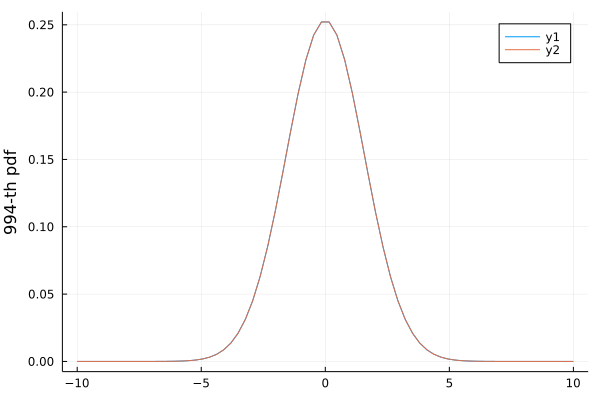

In [27]:
plot(vs.u, data[idx], ylabel="$(idx)-th pdf")
plot!(vs.u, M)